In [111]:
import numpy as np
import cv2
import os
import pandas as pd
import string
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
import tensorflow as tf
import datetime
import platform
import math



In [112]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [113]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

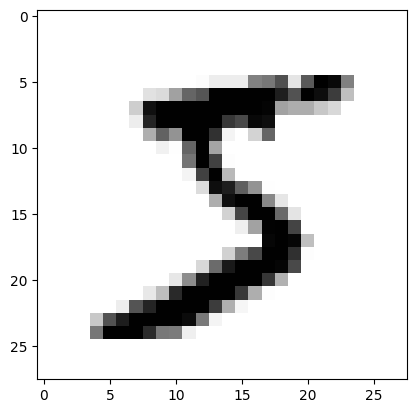

In [114]:
plt.imshow(x_train[0],cmap='binary')

In [115]:
IMAGE_WIDTH=28
IMAGE_HEIGHT=28
IMAGE_CHANNELS=1

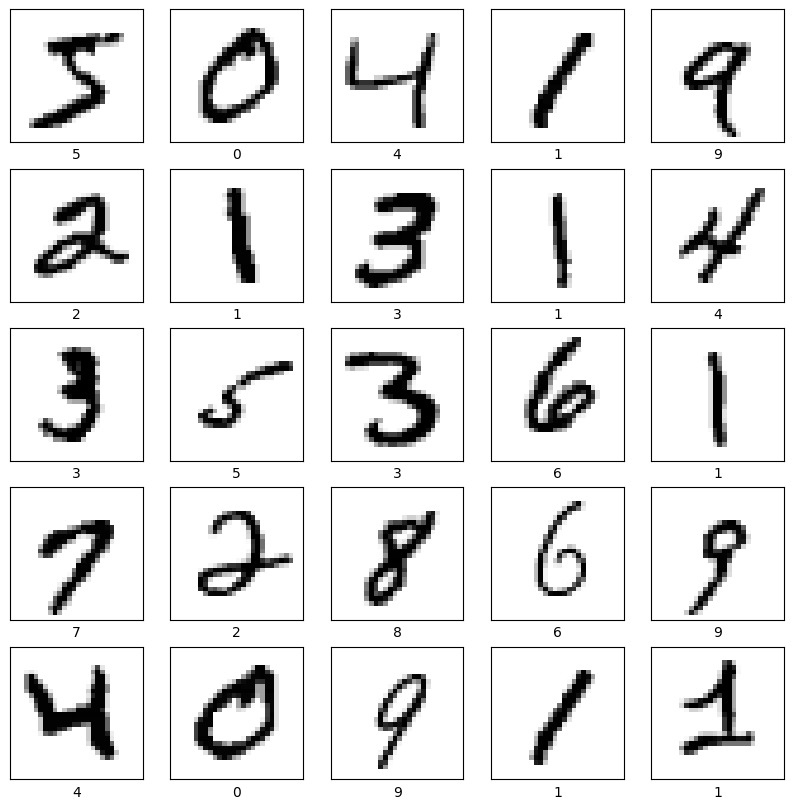

In [116]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [117]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [118]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [119]:
x_train_normalized[0][18]


array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [120]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(28, 28,1),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [121]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 12, 12, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 4, 4, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)              

In [122]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [123]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2136 - accuracy: 0.9343 - val_loss: 0.0584 - val_accuracy: 0.9816
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0704 - accuracy: 0.9785 - val_loss: 0.0424 - val_accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0499 - accuracy: 0.9847 - val_loss: 0.0400 - val_accuracy: 0.9873
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0403 - accuracy: 0.9875 - val_loss: 0.0353 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0344 - accuracy: 0.9886 - val_loss: 0.0313 - val_accuracy: 0.9899
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0284 - accuracy: 0.9907 - val_loss: 0.0281 - val_accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.0390 - val_accuracy:

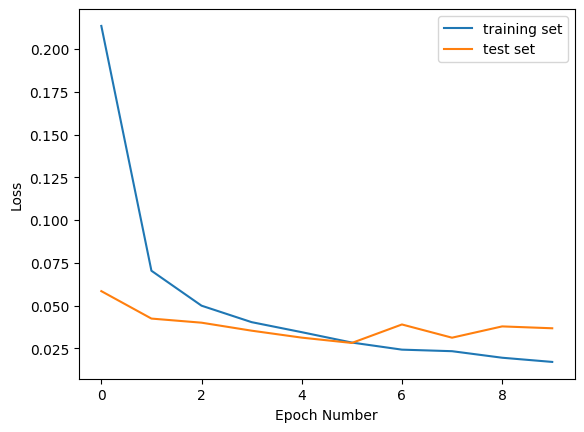

In [125]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

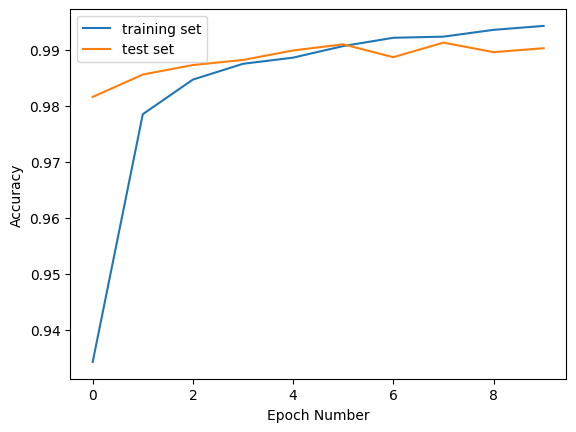

In [126]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [127]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0098 - accuracy: 0.9967


In [128]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.009817428886890411
Training accuracy:  0.996666669845581


In [129]:
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0367 - accuracy: 0.9903


In [130]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.03672856464982033
Validation accuracy:  0.9902999997138977


In [131]:
model.save('C:/Users/Dareen/OneDrive/Desktop/handwritten/digits2.h5')

In [132]:
predictions_one_hot = model.predict([x_test_normalized])

313/313 [==============================] - 1s 2ms/step


In [133]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [134]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.817872e-17,1.360222e-11,1.466479e-11,2.433619e-11,3.818841e-11,2.687329e-16,3.688045e-21,1.000000e+00,3.193889e-16,5.233875e-10
1,5.124886e-10,4.687595e-08,1.000000e+00,4.011127e-15,6.618434e-14,9.719954e-16,4.458063e-12,4.952976e-12,5.077199e-11,5.948925e-16
2,2.605457e-12,9.999973e-01,1.969383e-08,4.973411e-12,1.075518e-06,7.590851e-09,4.731984e-09,1.624349e-06,8.130740e-09,1.620920e-10
3,9.999977e-01,7.666872e-15,3.044691e-07,1.328717e-11,3.042196e-10,3.482918e-07,1.532205e-06,4.368835e-08,2.800403e-09,3.615548e-08
4,1.712783e-17,5.861413e-15,4.870666e-12,2.866968e-19,1.000000e+00,8.216328e-18,1.364515e-15,7.508711e-15,8.535810e-11,1.127133e-09
...,...,...,...,...,...,...,...,...,...,...
9995,1.366598e-12,4.731247e-10,9.999985e-01,1.094533e-12,2.570459e-19,9.913178e-20,2.907484e-18,1.573419e-06,2.502811e-14,1.007653e-15
9996,9.013384e-13,1.131628e-08,4.185027e-11,9.999981e-01,1.789252e-13,1.876787e-06,9.552247e-16,1.936843e-09,2.311835e-15,7.917246e-09
9997,2.516817e-26,1.597071e-13,9.499167e-18,5.973556e-22,1.000000e+00,1.537847e-19,9.164463e-20,1.590679e-11,4.580748e-11,2.787844e-15
9998,1.430537e-14,9.691357e-19,3.369620e-19,4.529529e-12,5.885099e-21,1.000000e+00,3.129279e-11,4.291865e-17,1.379414e-08,7.899593e-14


In [135]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [136]:
print(predictions[0])

7


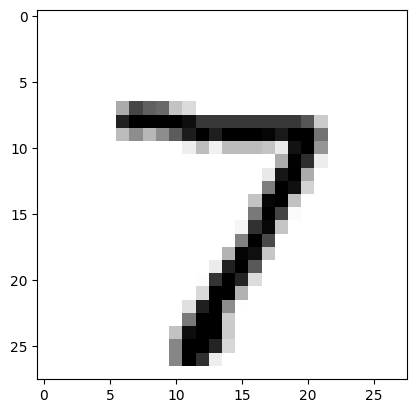

In [137]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

C:\Users\Dareen\AppData\Local\Temp\ipykernel_25100\370755296.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


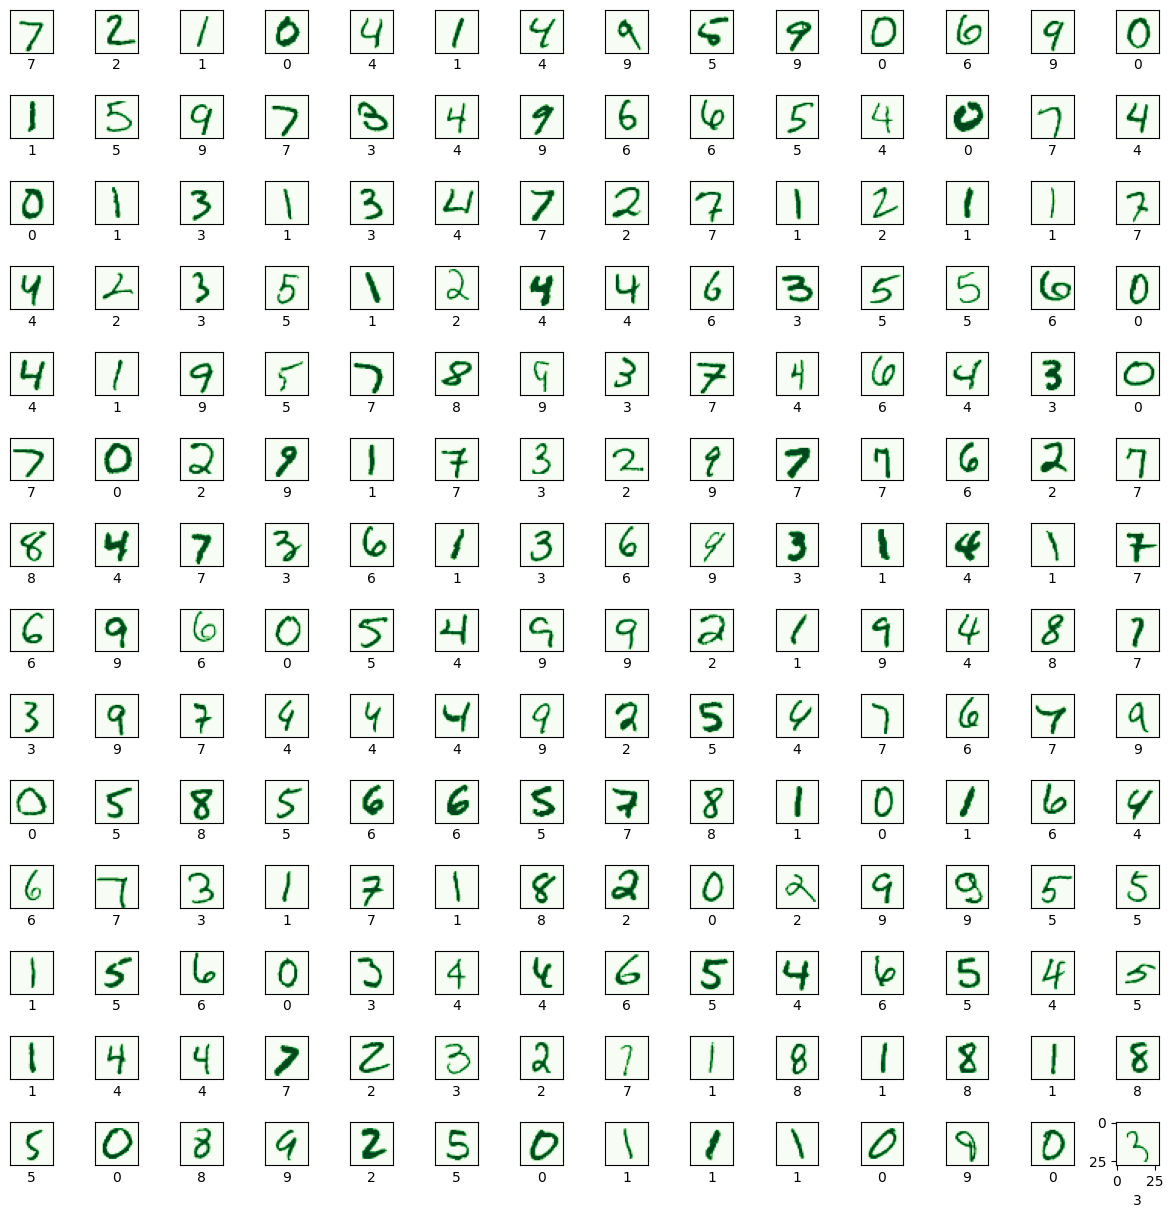

In [138]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()